# Аналитика интернет-магазина

**Цель исследования** — проверка гипотез для увеличения выручки интернет-магазина7 Необхозимо приоритизировать гипотезы, запустить A/B-тест.

Проект разделен на 2 части

**Часть 1. Приоритизация гипотез.**

Дан файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:** 
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

Данные - результаты проведенного A/B-теста.

**Задача:** 

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Посчитать точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

 
## Описание данных

**Данные для первой части**

Структура таблицы `hypothesis`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
Структура таблицы `orders`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Структура таблицы `visitors`:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


# Часть 1. Приоритизация гипотез.

## Обзор данных

### Открыть файл с данными и изучить общую информацию

Импортирую библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats as st
from datetime import datetime, timedelta
import datetime as dt
import scipy.stats as stats

# импорт библиотеки warnings
import warnings
warnings.filterwarnings('ignore')

# задам точность отображения данных типа float (2 знака после запятой)
pd.options.display.float_format = '{:.2f}'.format

# чтобы формулировка гипотезы была полностью видна
pd.set_option('display.max_colwidth', 1000)

### Загрузить данные и подготовить их к анализу

In [2]:
import os

pth1 = '/Users/pesotskayakatya/Desktop/Яндекс Практикум/Проект_7_проверка гипотез/hypothesis.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/visits_info_short.csv' 

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    hypothesis = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Выведу первые 5 строчек датафрейма на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены.

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Выведу основную информацию о датафрейме.

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов и 9 строк: 
- 4 столбца - тип данных int;
- 1 столбец - тип данных object.

1. Названия столбцов необходимо привести к нижнему регистру.

2. Пропуски данных отсутствуют. 

3. Дубликатов не выявлено.

Согласно документации к данным:
Структура таблицы `hypothesis`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Предобработка данных

### Переименование столбцов

Все столбцы в датафрейме hypothesis приведу к нижнему регистру.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
# проверка

print('названия столбцов таблицы hypothesis{}'.format(hypothesis.columns))

названия столбцов таблицы hypothesisIndex(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


Названия столбцов корректные, пропусков в данных нет. Проверю наличие аномальных значений. 

### Исследование аномальных значений

In [7]:
hypothesis.describe()

,reach,impact,confidence,efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Во всех столбцах с числовыми данными не может быть значений больше 10, что подтверждает описательная статистика. Минимальное значение также в пределах нормы. Выбросов не обнаружено.

**Вывод**

Во время предобработки данных:

1. Названия всех столбцов приведены к нижнему регистру;

2. Аномалий и дубликатов не выявлено.

Можно приступать к приоритизации гипотез

## Часть 1. Приоритизация гипотез

### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Для начала выведу первые 5 строчек датафрейма, а затем создам новый столбец 'ICE', в который сохраню величину параметра 'ICE' для каждой гипотезы. 

In [8]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод**

Наиболее перспективные гипотезы по ICE: 
- 8 - Запустить акцию, дающую скидку на товар в день рождения (ICE 16,2); 
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE 13,3);
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE 11,2);
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (ICE 8,0);
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (ICE 7,0)

### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Создам новый столбец 'RICE', в который сохраню величину параметра 'RICE' для каждой гипотезы. 

In [9]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Вывод**

Наиболее перспективные гипотезы по RICE: 
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE 112,0); 
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (RICE 56,0);
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (RICE 40,0);
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (RICE 40,0);
- 8 - Запустить акцию, дающую скидку на товар в день рождения (RICE 16,2). 

### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Наиболее перспективные гипотезы по ICE под номеерами 8, 0, 7, 6, 2. Однако по RICE перспективность гипотез меняется (7, 2, 0, 6, 8) и для некоторых гипотез увеличивается в разы.

Для гипотезы 8 при применении RICE вместо ICE показатель не изменился. Значит, акция, дающая скидку на товар в день рождения практически не затронет пользователей.

Для гипотезы 0 при применении RICE вместо ICE показатель увеличился. Два новых канала трафика приведут новых пользователей, что приведет к увеличению reach.

Для гипотезы 7 при применении RICE вместо ICE показатель увеличился практически в 10 раз. Если добавить форму подписки на все основные страницы, то это изменение затронет большинство пользователей, что и привело к росту перспективности гипотезы.

Для гипотезы 6 при применении RICE вместо ICE показатель увеличился. Если на главную страницу добавить баннеры с актуальными акциями и распродажами, то это увеличит взаимодействие с пользователями, и может увеличить конверсию.

Для гипотезы 2 при применении RICE вместо ICE показатель увеличился. Добавление рекомендаций товаров на сайт увеличит количество пользователей, которых затронет это изменение. 

В целом для всех гипотез кроме одной (восьмой) заметно значительное увеличение показателя перспективности при применении RICE вместо ICE. Однако внедрение гипотезы 7, 2 затронет большее количество пользователей, чем применение гипотез 0, 6.

Таким образом, изменение приоретизации гипотез произошло за счет добавления в формулу расчета RICE параметра Reach, который показывает охват пользователей.

# Часть 2. Анализ A/B-теста

### Загрузить данные и подготовить их к анализу

Считываю данные из файла и сохраню их в датафрейм orders и visitors.

In [10]:
import os

pth1 = '/Users/pesotskayakatya/Desktop/Яндекс Практикум/Проект_7_проверка гипотез/orders.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/visits_info_short.csv' 

if os.path.exists(pth1):
    orders = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    orders = pd.read_csv(pth2) 
else:
    print('Something is wrong')

In [11]:
import os

pth1 = '/Users/pesotskayakatya/Desktop/Яндекс Практикум/Проект_7_проверка гипотез/visitors.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/visits_info_short.csv' 

if os.path.exists(pth1):
    visitors = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    visitors = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Выведу первые 5 строчек датафрейма orders и visitors на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены. А затем выведу основную информацию о датафрейме.

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов и 1197 строк: 
- 3 столбца - тип данных int;
- 2 столбца - тип данных object.

1. Названия столбцов корректны.

2. Пропуски данных отсутствуют. 

3. Необходимо преобразовать тип данных столбца date в datetime.

Согласно документации к данным:
Структура таблицы `orders`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца и 62 строки: 
- 1 столбец - тип данных int;
- 2 столбца - тип данных object.

1. Названия столбцов корректны.

2. Пропуски данных отсутствуют. 

3. Необходимо преобразовать тип данных столбца date в datetime.

Согласно документации к данным:
Структура таблицы `visitors`:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Предобработка данных

### Преобразование типов данных

Необходимо преобразовать тип данных столбца date в datetime

In [16]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [17]:
# проверка

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
# проверка

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверка дубликатов

Проверю явные дубликаты в каждом датафрейме.

In [19]:
print('Количество явных дубликатов в таблице orders: {}\n'
      'Количество явных дубликатов в таблице visitors: {}\n'\
      .format(orders.duplicated().sum(), visitors.duplicated().sum()))

Количество явных дубликатов в таблице orders: 0
Количество явных дубликатов в таблице visitors: 0



Дубликатов в данных нет. Осталось проверить аномальные значения.

### Исследование аномальных значений

In [20]:
orders.describe()

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


В таблице orders есть сильные выбросы в столбце revenue. На данном этапе запомним этот момент, а работать с аномальными значениями буду позже, когда дойду до шага с вычислением процентилей, чтобы определить границы для аномальных заказов.

In [21]:
visitors.describe()

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


В таблице visitors есть аномальные значения количества пользователей в указанную дату в указанной группе A/B-теста, с этим также буду работать позже.

**Вывод**

Во время предобработки данных:

1. У столбца date в датафрейме orders и visitors изменен тип данных на datetime;

2. Дубликатов не выявлено;

3. Аномальные значения будут обработаны позже

Можно приступать к анализу A/B-теста.

## Анализ A/B-теста.

### Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм `cumulativeData` со столбцами: 

* `date` — дата;
* `group` — группа A/B-теста (A или B);
* `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
* `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах

In [23]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]\
                              .agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'transactionId' : 'nunique', 
                                    'visitorId' : 'nunique', 
                                    'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [24]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                                         visitors['group'] == x['group'])]\
                                .agg({'date' : 'max',
                                      'group' : 'max', 
                                      'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 'date', 'group', 'orders', 'buyers', 'revenue', 'visitors'.

In [25]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 


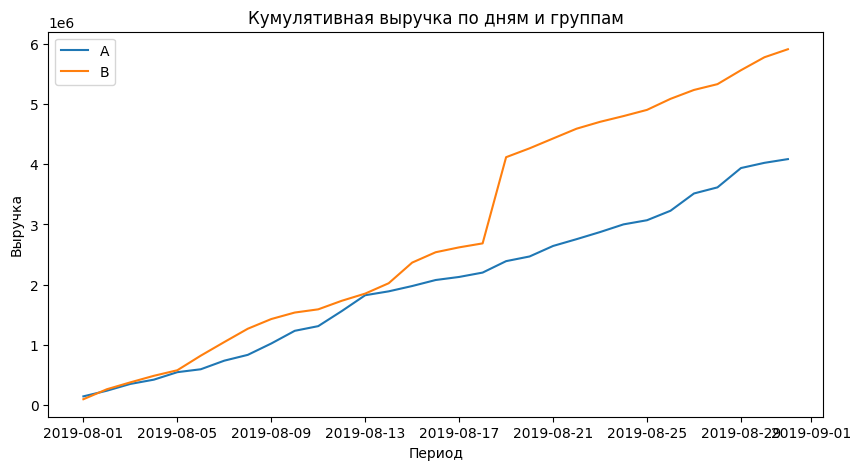

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (10,5))
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Период')
plt.ylabel('Выручка')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.legend();

**Вывод:**

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в одной точке резко растут. У группы В этот всплеск наиболее выраженный. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы буду анализировать позже.

### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

Чтобы построить графики среднего чека по группам — разделю кумулятивную выручку на кумулятивное число заказов.

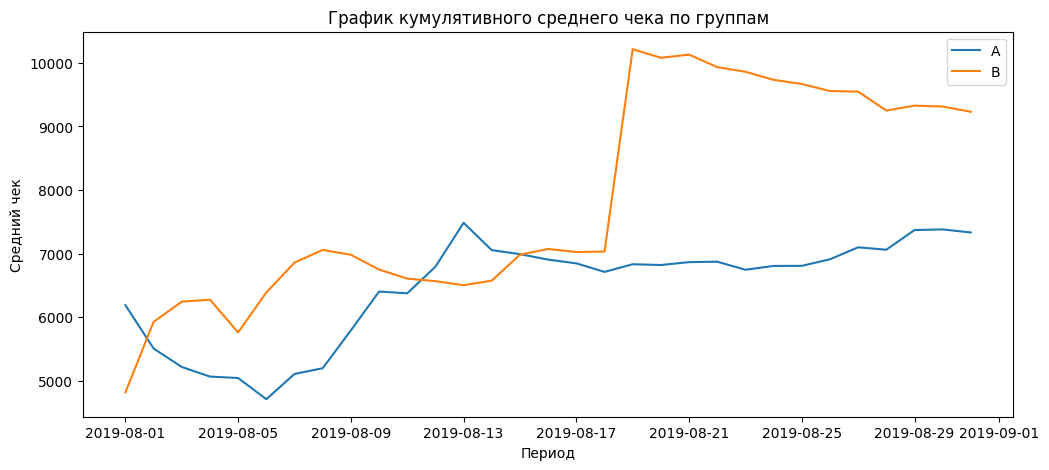

In [27]:
plt.figure(figsize = (12,5))

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Период')
plt.ylabel('Средний чек')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

**Вывод:**

Средний чек частично становится равномерным ближе к концу теста для группы А, а для группы В после сильного скачка на середине теста начинает плавно уменьшаться. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Вероятно группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

Для этого сначала добавлю горизонтальную ось методом axhline().

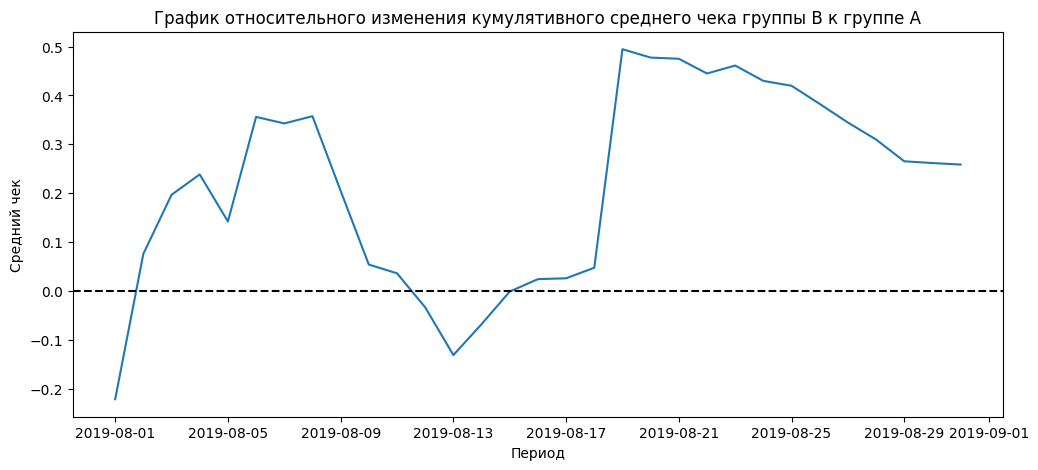

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

plt.figure(figsize = (12,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Период')
plt.ylabel('Средний чек')


# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет», а на 13 августа резко падает. Эти скачки указывают на аномально большие заказы. Но в целом тренд положительный.

**Вывод:**

График различия среднего чека говорит о том, что результаты группы B в большинстве случаев превышает средний чек группы А и сейчас почти на 30% выше.

### Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

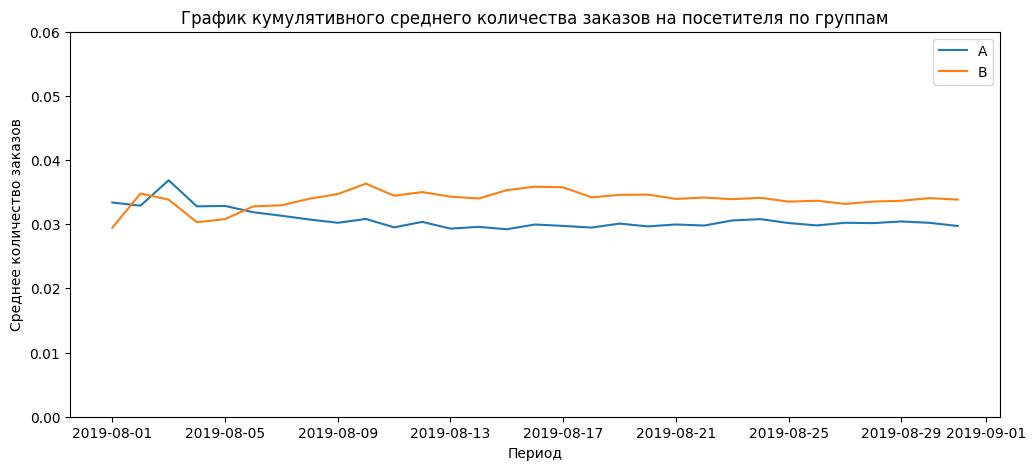

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (12,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Период')
plt.ylabel('Среднее количество заказов')

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.legend();

# задаем масштаб осей
plt.ylim([0, 0.06]);

**Вывод:**

Получился практически симметричный график. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

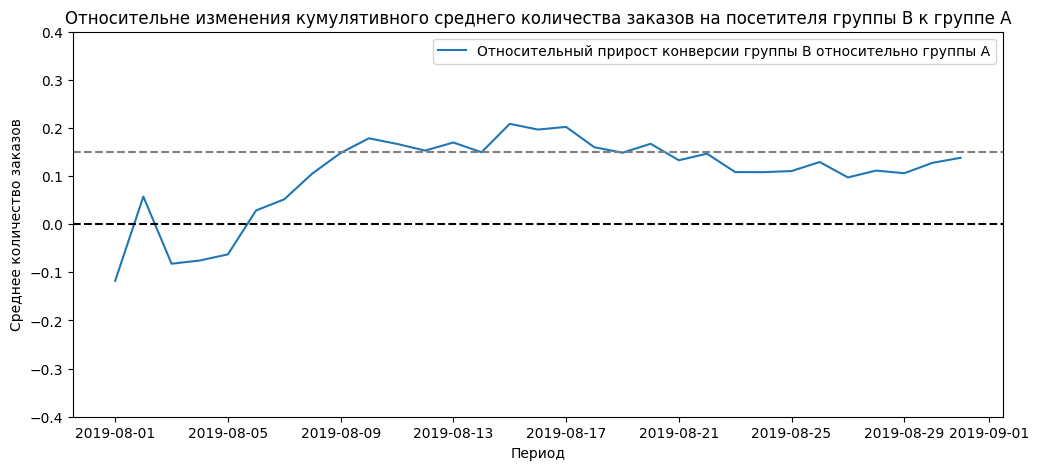

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
                                            .merge(cumulativeDataB[['date','conversion']], 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
# строим графики
plt.figure(figsize = (12,5))
plt.title('Относительне изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Период')
plt.ylabel('Среднее количество заказов')


plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A");
plt.legend();

# задаем масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.ylim([-0.4, 0.4]);


В начале теста группа B резко первысила группу А, потом скачек вниз, а затем значительный рост. Под конец конверсия незначительно упала, а затем начала расти, но не стала ниже группы А. 
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 

**Вывод:**

Результаты группы B лучше группы A и есть значительная тенденция к улучшению.


### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

Сначала посчитаю количество заказов по пользователям 

In [31]:
ordersByUsers = orders.groupby('visitorId', as_index=False)\
                    .agg({'transactionId': 'nunique'})

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Далее построю точечную диаграмму числа заказов на одного пользователя.

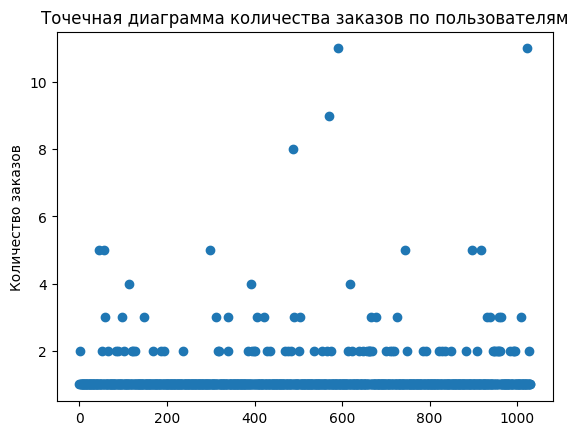

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Точечная диаграмма количества заказов по пользователям')
plt.ylabel('Количество заказов');
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:**

Большинство покупателей заказывали только один раз или 2. Есть пользователи с 3 и более заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. Посчитаю перцентили более подробно: 95, 96, 97, 98 и 99.

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99]))

[2. 2. 2. 3. 4.]


Не более 2% пользователей оформляли больше чем 2 заказа. Примем это за верхнюю границу числа заказов.

**Вывод:**

Разумно выбрать 3 и более заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Потеря 2% данных приемлема.

### Посчитать точечный график стоимостей заказов. Сделать выводы и предположения.

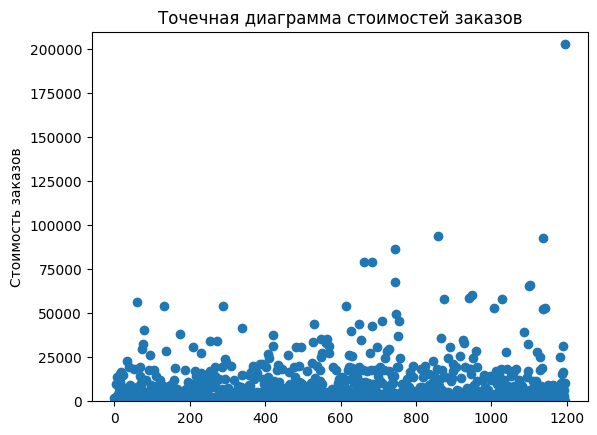

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title('Точечная диаграмма стоимостей заказов')
plt.ylabel('Стоимость заказов');
plt.ylim(0, 210000)
plt.scatter(x_values, orders['revenue']);

**Вывод:**

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 40 тыс. и 200 тыс.

### Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [36]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформили заказ больше чем на 28 тыс. И не более 1% пользователей оформили заказ больше чем на 58 тыс. Посчитаю перцентили более подробно: 95, 96, 97, 98 и 99.

In [37]:
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99]))

[28000.  31382.  35485.  44133.2 58233.2]


Не более 2% пользователей оформили заказ больше чем на 44 тыс Примем это за верхнюю границу стоимости заказов.

**Вывод:**

Граница для определения аномальных заказов - сумма заказа более 44 тыс. Потеря 2% данных приемлема.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

---

Имеем две генеральных совокупности: заказы по группам А и В.

**Сформулирую нулевую и двустороннюю альтернативную гипотезу:**

**H₀** - статистически значимых различий в среднем числе заказов на посетителя между группами по «сырым» данным  нет,

**H₁** - статистически значимых различий в среднем числе заказов на посетителя между группами по «сырым» данным есть.

Критерий значимости возьму 0.05

Чтобы проверить гипотезу применю метод st.mannwhitneyu(array1, array2) - «U-критерий Манна-Уитни».

---


Для расчета статистической значимости различий в конверсии между группами необходимо подготовить имеющиеся данные. Сформирую новый датафрейм `data` со следующими столбцами:

* `date` — дата;
* `orders_per_date_a` — количество заказов в выбранную дату в группе A;
* `revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;
* `orders_per_date_b` — количество заказов в выбранную дату в группе B;
* `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
* `orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;
* `orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;
* `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
* `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
* `visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;
* `visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.


In [38]:
# расчет количества пользователей в выбранную дату в группе А

visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А

visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]\
                                         .agg({'date': 'max','visitors_per_date_a': 'sum'}),axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

In [39]:
# расчет количества пользователей в выбранную дату в группе В

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В

visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]\
                                     .agg({'date': 'max', 
                                           'visitors_per_date_b': 'sum'}),axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [40]:
# расчет количества заказов и суммарной выручки в выбранную дату в группе A

orders_a_daily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                     .groupby('date', as_index=False)\
                     .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

In [41]:
# расчет суммарного числа заказов до выбранной даты включительно в группе A

orders_a_cummulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]\
                                     .agg({'date': 'max', 
                                       'orders_per_date_a': 'sum', 
                                       'revenue_per_date_a': 'sum'}),axis=1)\
                                     .sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a','revenue_cummulative_a']

In [42]:
# расчет количества заказов и суммарной выручки в выбранную дату в группе B

orders_b_daily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                    .groupby('date', as_index=False)\
                    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']


In [43]:
# расчет суммарного числа заказов до выбранной даты включительно в группе B

orders_b_cummulative = orders_b_daily.apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]\
                                 .agg({'date': 'max', 
                                       'orders_per_date_b': 'sum', 
                                       'revenue_per_date_b': 'sum'}),axis=1,)\
                                 .sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [44]:
# объединение датафреймов в один общий

data = (orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
                    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
                    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
                    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
                    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
                    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
                    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left'))

data.head(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Далее чтобы посчитать статистическую значимость различия в среднем количестве заказов между группами, создам переменные orders_by_users_a и orders_by_users_b со столбцами `userId`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов. 

In [45]:
orders_by_users_a = (orders[orders['group'] == 'A']\
                           .groupby('visitorId', as_index=False)\
                           .agg({'transactionId': pd.Series.nunique}))
orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B']\
                           .groupby('visitorId', as_index=False)\
                           .agg({'transactionId': pd.Series.nunique}))
orders_by_users_b.columns = ['userId', 'orders']

Далее объявлю переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная `sample_a` должна состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: `orders_by_users_a['orders']`.
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])`. 

In [46]:
sample_a = pd.concat([orders_by_users_a['orders'],\
           pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), \
                     name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],\
           pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), \
                     name='orders')],axis=0)

Теперь уже можно посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [47]:
results = stats.mannwhitneyu(sample_a, sample_b)

# задаю значение уровня значимости alpha
alpha = .05

# вывод значения p-value на экран 
print("p-значение: {0:.3f}".format(results.pvalue))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
    
print("Относительный прирост среднего числа заказов группы B: {0:.2%}".format(sample_b.mean() / sample_a.mean() - 1))

p-значение: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост среднего числа заказов группы B: 13.81%


**Вывод:**

p-значение = 0.017, что меньше 0.05. Значит, нулевую гипотезу о том, статистически значимых различий в среднем числе заказов на посетителя между группами по «сырым» данным нет, отвергаем. Разница статистически значима. Также относительный прирост среднего числа заказов группы B составляет почти 14%.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

---

Имеем две генеральных совокупности: заказы по группам А и В.

**Сформулирую нулевую и двустороннюю альтернативную гипотезу:**

**H₀** - статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет,

**H₁** - статистически значимые различия в среднем чеке между группами по «сырым» данным есть.

Критерий значимости возьму 0.05

Чтобы проверить гипотезу применю метод st.mannwhitneyu(array1, array2) - «U-критерий Манна-Уитни».

---

In [48]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'])

# задаю значение уровня значимости alpha
alpha = .05

# вывод значения p-value на экран 
print("p-значение: {0:.3f}".format(results.pvalue))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
    
print("Относительный прирост среднего числа заказов группы B: {0:.2%}"\
      .format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего числа заказов группы B: 25.87%


**Вывод:**

p-значение = 0.729, что сильно больше 0.05. Значит, нулевую гипотезу о том, статистически значимых различий в среднем чеке между группами по «сырым» данным нет, не отвергаем. Вывод о различии сделать нельзя. Средний чек группы B выше среднего чека группы A почти на 26%.

### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

Ранее за аномальных пользователей приняты те, кто совершил от 3 заказов или совершил заказ дороже 44 тыс. Так я уберу 2% пользователей с наибольшим числом заказов и 2% пользователей с дорогими заказами. Сделаю срезы пользователей с числом заказов больше 3 — `users_with_many_orders` и пользователей, совершивших заказы дороже 44 тыс. — `users_with_expensive_orders`. Объединю их в таблице `ab_normal_users`. 

Узнаю, сколько всего аномальных пользователей.



In [49]:
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['userId'],
                                    orders_by_users_b[orders_by_users_b['orders'] > 2]['userId'],],axis=0,)

users_with_expensive_orders = orders[orders['revenue'] > 44000]['visitorId']

ab_normal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)\
                     .drop_duplicates()\
                     .sort_values())

print('Всего аномальных пользователей', ab_normal_users.shape[0]) 

Всего аномальных пользователей 40


Всего 40 аномальных пользователей.

Далее прежде чем считать статистическую значимасть подготовлю выборки количества заказов по пользователям по группам теста.

In [50]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['userId'].isin(ab_normal_users))]['orders'],\
            pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),\
            name='orders',),
    ],axis=0,)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['userId'].isin(ab_normal_users))]['orders'],
            pd.Series(0,index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),\
            name='orders',),
    ],axis=0,)

Теперь данные очищены от выбросов и готовы для проверки гипотезы.

---

Имеем две генеральных совокупности: заказы по группам А и В.

**Сформулирую нулевую и двустороннюю альтернативную гипотезу:**

**H₀** - статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет,

**H₁** - статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

Критерий значимости возьму 0.05

Чтобы проверить гипотезу применю метод st.mannwhitneyu(array1, array2) - «U-критерий Манна-Уитни».

---

In [51]:
results = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)

# задаю значение уровня значимости alpha
alpha = .05

# вывод значения p-value на экран 
print("p-значение: {0:.3f}".format(results.pvalue))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
    
print("Относительный прирост среднего числа заказов группы B: {0:.2%}"\
      .format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-значение: 0.007
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост среднего числа заказов группы B: 18.49%


Результаты по среднему количеству заказов практически не изменились.

**Вывод:**

p-значение = 0.007, что меньше 0.05. Значит, нулевую гипотезу о том, статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет, отвергаем. Разница статистически значима. Также относительный прирост среднего числа заказов группы B составляет почти 19%.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

---

Имеем две генеральных совокупности: заказы по группам А и В.

**Сформулирую нулевую и двустороннюю альтернативную гипотезу:**

**H₀** - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет,

**H₁** - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным есть.

Критерий значимости возьму 0.05

Чтобы проверить гипотезу применю метод st.mannwhitneyu(array1, array2) - «U-критерий Манна-Уитни».

---

In [52]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                                    np.logical_not(orders['visitorId'].isin(ab_normal_users)),)]['revenue'], 
                             orders[np.logical_and(orders['group'] == 'B',
                                    np.logical_not(orders['visitorId'].isin(ab_normal_users)),)]['revenue'])

# задаю значение уровня значимости alpha
alpha = .05

# вывод значения p-value на экран 
print("p-значение: {0:.3f}".format(results.pvalue))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
    
print("Относительный прирост среднего числа заказов группы B: {0:.2%}"\
      .format(orders[np.logical_and(orders['group'] == 'B',
                     np.logical_not(orders['visitorId'].isin(ab_normal_users)),)]['revenue'].mean() / 
              orders[np.logical_and(orders['group'] == 'A',
                     np.logical_not(orders['visitorId'].isin(ab_normal_users)),)]['revenue'].mean() - 1))

p-значение: 0.994
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего числа заказов группы B: 3.69%


**Вывод:**

p-значение = 0.994, что сильно больше 0.05. Значит, нулевую гипотезу о том, статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет, не отвергаем. Вывод о различии сделать нельзя. Средний чек группы B выше среднего чека группы A почти на 4%. 

Таким образом, после очистки данных от аномальных значений p-значение увеличился, но и разница между сегментами сократилась с 26% до 4%.

### Принять решение по результатам теста и объяснить его.

**Имеющиеся факты по анализу A/B-теста:**

- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым» данным, так и после фильтрации;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть значительная тенденция к улучшению.
- График различия среднего чека говорит о том, что результаты группы B в большинстве случаев превышает средний чек группы А и сейчас почти на 30% выше его.

**Исходя из обнаруженных фактов, тест следует продолжить. Конверсия сегмента B лучше сегмента A, однако, есть выбросы и небольшая тенденция к снижению. Это может быть как проблемой подглядывания, так и короткой продолжительностью теста.**

## Общий вывод

## Во время предобработки данных:

- Названия всех столбцов приведены к нижнему регистру в датафрейме hypothesis;
- Аномалий и дубликатов не выявлено в датафрейме hypothesis;
- У столбца date в датафрейме orders и visitors изменен тип данных на datetime;
- Дубликатов не выявлено в датафрейме orders и visitors;
- Аномальные значения в датафрейме orders и visitors будут обработаны перед анализом А/В тестов. 
- За аномальных пользователей приняты те, кто совершил от 3 заказов или совершил заказ дороже 44 тыс. Это 2% пользователей с наибольшим числом заказов и 2% пользователей с дорогими заказами. Эти пользователи были отфильтрованы при проверке гипотез.

## Во время приоритизация гипотез:

- Наиболее перспективные гипотезы по ICE: 
 - 8 - Запустить акцию, дающую скидку на товар в день рождения (ICE 16,2); 
 - 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE 13,3);
 - 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE 11,2);
 - 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (ICE 8,0);
 - 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (ICE 7,0)

- Наиболее перспективные гипотезы по RICE: 
 - 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE 112,0); 
 - 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (RICE 56,0);
 - 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (RICE 40,0);
 - 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (RICE 40,0);
 - 8 - Запустить акцию, дающую скидку на товар в день рождения (RICE 16,2). 

- Наиболее перспективные гипотезы по ICE под номеерами 8, 0, 7, 6, 2. Однако по RICE перспективность гипотез меняется (7, 2, 0, 6, 8) и для некоторых гипотез увеличивается в разы.Такое изменение приоретизации гипотез произошло за счет добавления в формулу расчета RICE параметра Reach, который показывает охват пользователей.

## Во время анализа А/В теста:

- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым» данным, так и после фильтрации;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть значительная тенденция к улучшению.
- График различия среднего чека говорит о том, что результаты группы B в большинстве случаев превышает средний чек группы А и сейчас почти на 30% выше его.

- **Исходя из обнаруженных фактов, тест следует продолжить. Конверсия сегмента B лучше сегмента A, однако, есть выбросы и небольшая тенденция к снижению. Это может быть как проблемой подглядывания, так и короткой продолжительностью теста.**

## Рекомендации:

- реализовать следующие гипотезы:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Остановить тест, зафиксировать отсутствие различий между группами.